In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))

project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)

from emt_models import k_series, k_parallel, k_geometric, keff_with_barrier


In [4]:
k_fibre = 0.20   # W/mK, cellulose fibre
k_air   = 0.026  # W/mK, air
k_poly  = 0.30   # W/mK, polymer barrier

print("Fibre k:", k_fibre)
print("Air k:", k_air)
print("Polymer k:", k_poly)


Fibre k: 0.2
Air k: 0.026
Polymer k: 0.3


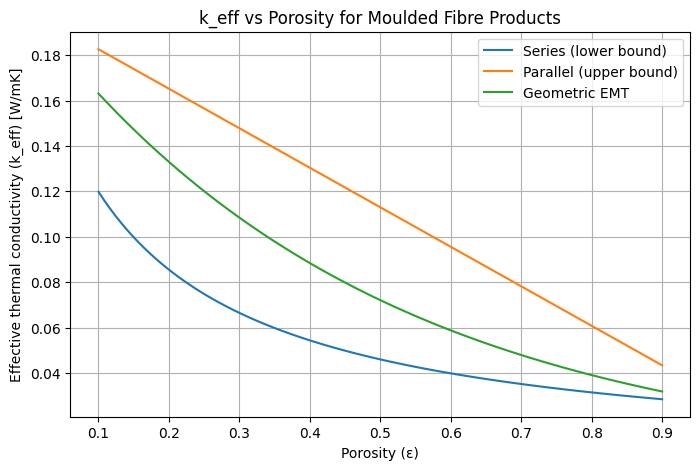

In [4]:
porosities = np.linspace(0.1, 0.9, 100)

k_ser = [k_series(k_fibre, k_air, eps) for eps in porosities]
k_par = [k_parallel(k_fibre, k_air, eps) for eps in porosities]
k_geo = [k_geometric(k_fibre, k_air, eps) for eps in porosities]

plt.figure(figsize=(8,5))
plt.plot(porosities, k_ser, label="Series (lower bound)")
plt.plot(porosities, k_par, label="Parallel (upper bound)")
plt.plot(porosities, k_geo, label="Geometric EMT")
plt.xlabel("Porosity (ε)")
plt.ylabel("Effective thermal conductivity (k_eff) [W/mK]")
plt.title("k_eff vs Porosity for Moulded Fibre Products")
plt.legend()
plt.grid(True)
plt.show()


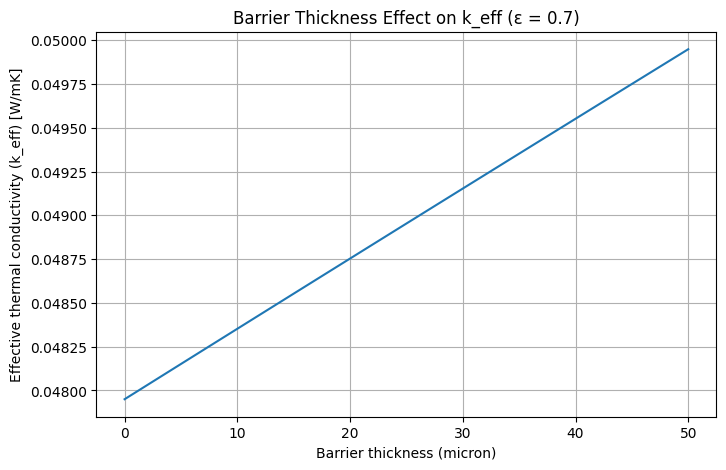

In [5]:
eps_example = 0.7
k_core = k_geometric(k_fibre, k_air, eps_example)

L_core = 1e-3  # 1 mm
barrier_thicknesses = np.linspace(0, 50e-6, 50)  # 0–50 micron

k_eff_values = []

for Lb in barrier_thicknesses:
    if Lb == 0:
        k_eff_values.append(k_core)
    else:
        k_eff_values.append(
            keff_with_barrier(k_core, L_core, k_poly, Lb)
        )

plt.figure(figsize=(8,5))
plt.plot(barrier_thicknesses * 1e6, k_eff_values)
plt.xlabel("Barrier thickness (micron)")
plt.ylabel("Effective thermal conductivity (k_eff) [W/mK]")
plt.title("Barrier Thickness Effect on k_eff (ε = 0.7)")
plt.grid(True)
plt.show()


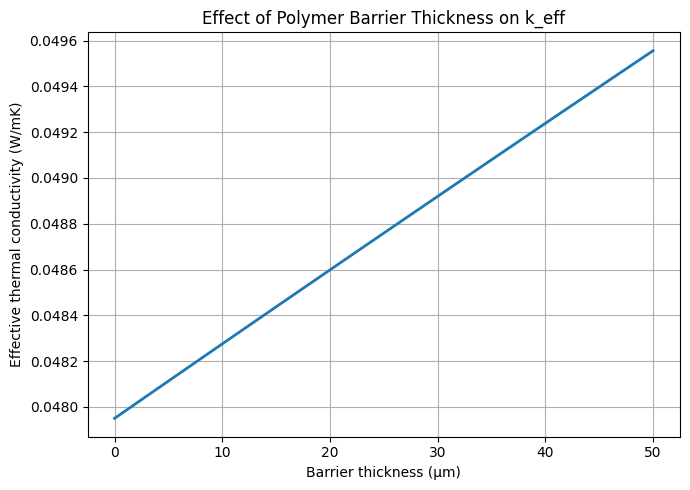

In [5]:
# ---- Barrier thickness vs effective thermal conductivity ----

import numpy as np
import matplotlib.pyplot as plt
from src.emt_models import k_geometric, keff_with_barrier


# parameters
k_fibre = 0.20       # fibre conductivity
k_air = 0.026        # air conductivity
eps = 0.70           # porosity
k_poly = 0.15        # polymer conductivity
L_core = 1e-3        # 1 mm core
barrier_thicknesses = np.linspace(0, 50e-6, 100)

# compute k_core from EMT
k_core = k_geometric(k_fibre, k_air, eps)

k_total = []
for Lb in barrier_thicknesses:
    if Lb == 0:
        k_total.append(k_core)
    else:
        k_total.append(keff_with_barrier(k_core, L_core, k_poly, Lb))

# plot
plt.figure(figsize=(7,5))
plt.plot(barrier_thicknesses*1e6, k_total, linewidth=2)
plt.xlabel("Barrier thickness (µm)")
plt.ylabel("Effective thermal conductivity (W/mK)")
plt.title("Effect of Polymer Barrier Thickness on k_eff")
plt.grid(True)
plt.tight_layout()
plt.show()
